In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm 

In [4]:
df = pd.read_csv('antropometria-dataset.csv')
df.head()

,folio,intp,entidad,desc_ent,sexo,edad,meses,peso,ropa,talla,...,hpresion,tbrazo,htension,PrimaryLast,code_upm,est_dis,est_urb,est_marg,pondef,est_var
0,210295,2,21,PUEBLA,2,38,8,73.70,2,146.4,...,16:30,2,16:35,1,R2101,5,3,1,3470.002176,215
1,101655,3,10,DURANGO,2,11,11,35.65,2,145.1,...,15:25,3,15:25,1,M1041,1,1,1,417.946672,101
2,10287,6,1,AGUASCALIENTES,2,18,8,54.80,1,162.0,...,9:40,1,9:40,1,M0108,5,3,1,472.980811,15
3,91526,4,9,DISTRITO FEDERAL,1,10,8,33.40,2,146.5,...,7:40,3,7:45,1,M0931,4,3,2,1832.581391,94
4,210939,3,21,PUEBLA,2,19,3,97.95,2,161.0,...,6:00,2,6:00,1,M2123,5,3,1,7622.066564,215


In [5]:
df.shape

(18640, 26)

In [6]:
df.columns

Index(['folio', 'intp', 'entidad', 'desc_ent', 'sexo', 'edad', 'meses', 'peso',
       'ropa', 'talla', 'emb', 'temb', 'cintura', 'cadera', 'sistol',
       'diastol', 'hpresion', 'tbrazo', 'htension', 'PrimaryLast', 'code_upm',
       'est_dis', 'est_urb', 'est_marg', 'pondef', 'est_var'],
      dtype='object')

In [8]:
vars = ['edad', 'peso', 'talla', 'cintura', 'cadera', 'sistol', 'diastol']
df = df[vars].dropna()
df[vars].corr()

,edad,peso,talla,cintura,cadera,sistol,diastol
edad,1.000000,0.318568,0.017608,0.478879,0.340062,0.535053,0.344207
peso,0.318568,1.000000,0.558683,0.791677,0.777061,0.355847,0.361438
talla,0.017608,0.558683,1.000000,0.245208,0.273173,0.140266,0.151905
cintura,0.478879,0.791677,0.245208,1.000000,0.863396,0.403265,0.362961
cadera,0.340062,0.777061,0.273173,0.863396,1.000000,0.307012,0.296613
sistol,0.535053,0.355847,0.140266,0.403265,0.307012,1.000000,0.662332
diastol,0.344207,0.361438,0.151905,0.362961,0.296613,0.662332,1.000000


In [12]:
x = pd.DataFrame(df['cintura'])
x = sm.add_constant(X)
y = pd.DataFrame(df['peso'])

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=42)

In [14]:
print(x_train.head())
print(x_train.shape)

       const  cintura
13244    1.0    85.65
3073     1.0    72.90
3544     1.0    98.50
2521     1.0    82.30
8912     1.0    81.05
(12622, 2)


In [21]:
print(x_test.head())
print(x_test.shape)


       const  cintura
13704    1.0    87.05
5497     1.0    76.10
13049    1.0   136.80
13880    1.0    91.50
15012    1.0    91.70
(5410, 2)


In [22]:
print(y_train.head())

        peso
13244  60.15
3073   47.65
3544   79.05
2521   53.20
8912   55.35


In [23]:
print(y_train.head())

        peso
13244  60.15
3073   47.65
3544   79.05
2521   53.20
8912   55.35


In [24]:
model = sm.OLS(y_train, x_train)
model = model.fit()

In [25]:
model

In [26]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   peso   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                 2.200e+04
Date:                Mon, 26 Sep 2022   Prob (F-statistic):               0.00
Time:                        11:50:50   Log-Likelihood:                -47896.
No. Observations:               12622   AIC:                         9.580e+04
Df Residuals:                   12620   BIC:                         9.581e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.2717      0.508    -18.269      0.0

In [27]:
residual_values = model.resid
residual_values

13244    -2.776848
3073     -4.529253
3544      5.291262
2521     -6.902970
8912     -3.699284
           ...    
11795    15.828954
12495    14.442383
5684     -2.344158
903      -6.297042
16394    -8.027649
Length: 12622, dtype: float64

In [28]:
m1_pred = model.fittedvalues
m1_pred

13244    62.926848
3073     52.179253
3544     73.758738
2521     60.102970
8912     59.049284
           ...    
11795    75.276046
12495    70.007617
5684     44.719158
903      44.972042
16394    63.727649
Length: 12622, dtype: float64

In [29]:
y_train.head(2)

,peso
13244,60.15
3073,47.65


<AxesSubplot: ylabel='Count'>

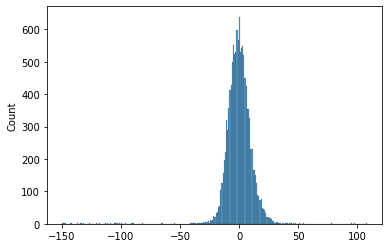

In [30]:
sns.histplot(model.resid)

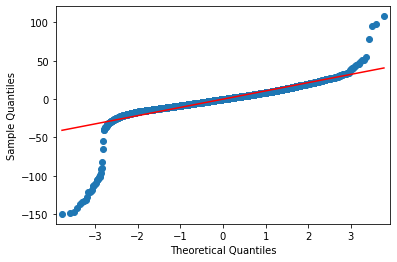

In [32]:
sm.qqplot(model.resid, line='s');

In [33]:
from scipy.stats import shapiro
shapiro(model.resid)


c:\Users\42mar\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.824905276298523, pvalue=0.0)

In [34]:
model.predict(x_test)

13704     64.106976
5497      54.876689
13049    106.043670
13880     67.858098
15012     68.026687
            ...    
18134     68.701046
6773      74.138065
10395     70.344796
12994     85.475724
9274      74.601687
Length: 5410, dtype: float64